<center>

## TRƯỜNG ĐẠI HỌC BÁCH KHOA  
## ĐẠI HỌC QUỐC GIA THÀNH PHỐ HỒ CHÍ MINH  
## KHOA KHOA HỌC & KỸ THUẬT MÁY TÍNH

<img src="Images/logo-bk.jpg" width="20%">

<br>

# Đề tài: Mô phỏng hệ thống Buffet tự phục vụ nhiều quầy


### Nhóm: Apex
### GVHD: Nguyễn Phương Duy

<br>
<br>
<br>
<br>
<br>
<br>

#### THÀNH PHỐ HỒ CHÍ MINH, THÁNG 12 - 2025

# 1. Team work declaration

## Team
| Student           | Id      |
|-------------------|---------|
| Lê Quang Minh | 2212047 |
| Vũ Trung Hiếu | 2012500 |
| Phạm Việt Cường | 1912830 |
| Phạm Gia Lương | 2211960 |
| Trịnh Tuấn Kiệt | 2211777 |
| Tạ Khang Hưng | 2211383 |
| Phan Hoàng Huynh | 2211316 |
| Nguyễn Nhật Khang | 2211454 |
<center>
Bảng 1. Thông tin thành viên.
</center>

## Workmap declaration

| Name | Student ID | Design Role | Dev Role | Eval Role | Report Role | Ass1 work description (details in text)  | Rating | week 2 outcome | week 3 outcome | week 4 outcome  |
|-----------|------------|-------------|----------|-----------|-------------|------------------------------------------|-----------------|----------------|----------------|-----------------|
| Minh        |      2212047      | yes      | no   | no    | yes     | Mở đầu, đặc tả hệ thống, chỉnh sửa và tổng hợp cuối  | A |   Good   |   Good   |    |
| Hiếu        |  2012500 | yes      | no | no |no      | Định nghĩa Chức năng và Giao diện | A | Good |  Good  |                 |
| Cường | 1912830 | yes      |no   | no    |no | Đặc tả hệ thống | A | Good  | Good  |                 |
| Lương |2211960 | no      | yes |  no |yes  | Hiện thực bài toán theo thiết kế | A |                |  Good | Good |
| Kiệt |2211777 | no      | yes| no    |yes | Xác minh và phân tích kết quả bài toán | A |                | Good | Good |
| Hưng | 2211383  | no      | no   | yes |no      | Đánh giá thiết kế |  |                |                |                 |
|    Huynh| 2211316 | no | no |yes| no |  Đánh giá thiết kế |  |                |                |                 |
|Khang | 2211454 | no | no | yes | no |  Đánh giá thiết kế |  |                |                |                 |

<center>
Bảng 2. Thông tin thành viên và vai trò.
</center>

# 2.System design

## System Performance Steps

### 1. Define Goal and System
Đề tài mô phỏng hoạt động của một nhà hàng buffet tự phục vụ, trong đó khách hàng đến ngẫu nhiên và chọn một trong nhiều quầy thức ăn khác nhau.


Đây là một ví dụ kinh điển về mạng lưới hàng đợi (a network of queues). Trong một nhà hàng buffet, thực khách không đi theo một hàng duy nhất, mà di chuyển giữa nhiều "trạm dịch vụ" (các quầy thức ăn) khác nhau, như quầy khai vị, quầy món chính, quầy tráng miệng,... Tại mỗi quầy, thực khách có thể phải xếp hàng (queue) nếu các "máy chủ" (server), tức là các vị trí (slots) tại quầy, đều đang bận. Thời gian phục vụ là thời gian thực khách lấy thức ăn. Sau khi xong một quầy, họ sẽ di chuyển đến quầy tiếp theo hoặc rời khỏi hệ thống (có thể hiểu là ra bàn ăn).


Hệ thống này cho phép mô hình hóa một mạng lưới hàng đợi phức tạp trong thực tế, phân tích các điểm nghẽn, thời gian chờ trung bình, và hiệu suất của từng quầy. Mục tiêu là đánh giá hiệu năng hoạt động của hệ thống phục vụ theo thời gian.

### 2. Service and Outcomes
Hệ thống buffet được mô tả sử dụng ký hiệu Kendall: A / B / m / K / n / D, trong đó:
* A: Phân phối thời gian giữa các khách đến.
* B: Phân phối thời gian phục vụ.
* m: Số lượng server.
* K: Dung lượng hệ thống.
* n: Tổng số khách hàng trong hệ.
* D: Quy tắc phục vụ.

Dịch vụ của hệ thống là việc phục vụ khách tại từng quầy buffet (lấy Salad -> Món chính -> Tráng miệng -> Đồ uống), nơi mỗi quầy được mô hình hóa như một hàng đợi M/M/c/K, trong đó.

- **A = M:** Luồng khách đến quầy tuân theo phân phối Poisson *(Poisson arrival)*.  
- **B = M:** Thời gian lấy thức ăn tại quầy tuân theo phân phối mũ *(Exponential service time)*.  
- **m = c:** Số vị trí (server) tại quầy.  
- **K = K:** Sức chứa tối đa của quầy.

Kết quả mong muốn gồm:
* Hiệu suất phục vụ tại từng quầy.

* Trải nghiệm khách hàng (thời gian chờ, tổng thời gian trong hệ thống).
* Luồng di chuyển khách giữa các quầy theo xác suất thực tế.
* Số khách được phục vụ hoặc bị từ chối khi quầy đầy.
* Phát hiện quầy tắc nghẽn và đề xuất cải thiện.

Hệ thống mô phỏng xử lý ba loại sự kiện: khách đến, khách được phục vụ, khách hoàn tất và được định tuyến sang quầy khác hoặc rời hệ thống.

### 3. Select Metrics
Hệ thống sử dụng các metric tiêu chuẩn của phân tích hàng đợi:

* Wq - Thời gian chờ trung bình.

- Ký hiệu: $ W_q $
- Công thức:

$$
\overline{W}_q = \frac{1}{N_{runs}} \sum_{i=1}^{N_{runs}} W_{q, i}
$$

→ Cho biết trung bình khách phải chờ bao lâu trước khi được phục vụ.

* S - Thời gian phục vụ trung bình.

- Ký hiệu: $ S $
- Trung bình thời gian nhân viên (server) phục vụ 1 khách.
- Dùng để kiểm tra tính ổn định và hiệu suất phục vụ.

* W - Thời gian lưu trú trung bình (W = Wq + S).

- Ký hiệu: $\overline{W}$
- Ý nghĩa: Tổng thời gian khách ở trong hệ thống = **Thời gian chờ + Thời gian phục vụ.**

$$
\overline{W} = \frac{1}{N_{runs}} \sum_{i=1}^{N_{runs}} W_i
$$

$\rightarrow$ Cho biết **mức độ hài lòng tổng thể của khách hàng**.

* Lq - Độ dài hàng đợi trung bình.

- Ký hiệu: $\overline{L}_q$
- Ý nghĩa: Trung bình số khách đang chờ tại quầy.

$$
\overline{L}_q = \frac{1}{N_{runs}} \sum_{i=1}^{N_{runs}} L_{q, i}
$$

$\rightarrow$ Cho biết **mức độ tắc nghẽn** của quầy.

* L - Số khách trong hệ thống trung bình.

- Ký hiệu: $\overline{L}$
- Ý nghĩa: Bao gồm cả khách đang được phục vụ + khách đang chờ.

* ρ - Tỷ lệ sử dụng server.

- Ký hiệu: $\rho$
- Ý nghĩa: Cho biết server hoạt động bao nhiêu phần trăm thời gian.
$$
\overline{\rho} = \frac{1}{N_{runs}} \sum_{i=1}^{N_{runs}} \rho_i
$$

$\rightarrow$ Giúp xác định xem nhân viên (server) có bị **quá tải hoặc nhàn rỗi**.

* Pblock - Xác suất bị từ chối (full capacity).

- Ký hiệu: $P_{block}$
- Tính bằng:

$$
P_{block} = \frac{\text{Số khách bị từ chối}}{\text{Tổng số khách đến}}
$$

$\rightarrow$ đánh giá khả năng **đáp ứng của hệ thống**.

* X - Thông lượng (output rate).

- Ký hiệu: $\overline{X}$
- Ý nghĩa: Là **số khách được phục vụ hoàn tất / đơn vị thời gian**.

$$
\overline{X} = \frac{1}{N_{runs}} \sum_{i=1}^{N_{runs}} X_i
$$

$\rightarrow$ Phản ánh **hiệu suất tổng thể** của hệ thống.


Các metric được tính trung bình trên N_runs (số lần thực hiện mô phỏng) mô phỏng.
### 4. List System Parameters
Global parameters

* λ_source: tốc độ đến khách (Poisson).

* T_sim: thời gian mô phỏng.

* N_runs: số lần chạy để lấy thống kê ổn định.

* K_total: tổng sức chứa khách trong khu vực buffet.

* Station-specific parameters

Mỗi quầy có:

* c: số server (slot lấy thức ăn).

* K: sức chứa tối đa.

* μ: tốc độ phục vụ (exponential service rate).

* 1/μ: thời gian phục vụ trung bình.

* Routing matrix P(i->j): xác suất di chuyển giữa các quầy.

Routing matrix

| **Từ / Đến** | **Q_Salad (1)** | **Q_Main (2)** | **Q_Dessert (3)** | **Q_Drink (4)** | **Sink (5)** | **Tổng** |
|---------------|------------------|-----------------|--------------------|------------------|---------------|-----------|
| **Source (0)** | 0.65 | 0.25 | 0.00 | 0.10 | 0.00 | 1.00 |
| **Salad (1)** | 0.00 | 0.75 | 0.00 | 0.2 | 0.05 | 1.00 |
| **Main (2)** | 0.03 | 0.00 | 0.55 | 0.20 | 0.22 | 1.00 |
| **Dessert (3)** | 0.00 | 0.05 | 0.00 | 0.30 | 0.65 | 1.00 |
| **Drink (4)** | 0.07 | 0.13 | 0.05 | 0.00 | 0.75 | 1.00 |
<center>
Bảng 3. Ma trận định tuyến cho hệ thống.
</center>
---

#### Giải thích Định tuyến Đề xuất:

- **Source:** 65% khách bắt đầu tại quầy Salad, 25% đi thẳng đến Main, 10% chọn Drink. Phản ánh thói quen phổ biến là lấy khai vị hoặc món chính trước.  
- **Salad:** 75% chuyển sang Main, 20% qua Drink, 5% rời hệ thống. Thể hiện hành vi “ăn nhẹ trước, rồi lấy món chính”.  
- **Main:** 55% sang Dessert, 20% qua Drink, 22% rời, 3% quay lại Salad. Đây là quầy trung tâm, nơi khách tỏa đi nhiều hướng.  
- **Dessert:** 30% sang Drink, 5% quay lại Main, 65% rời hệ thống — hầu hết kết thúc bữa ăn sau tráng miệng.  
- **Drink:** 75% rời hệ thống sau khi lấy đồ uống, 13% quay lại Main, 7% sang Salad, 5% sang Dessert.

Hệ thống hàng đợi được mô tả với các tham số định tuyến trong bảng 3 như sau:  

<center>
<!-- ![multi queue](multi-queue.png) -->
<img src="Images/multi-queue.png" width="80%">
</center>

<center>
Hình 1. Hệ thống đa hàng đợi của mô hình Buffet tự phục vụ.
</center>

### 5. List Factors to Study
Các yếu tố ảnh hưởng đến hiệu suất hệ thống cần được khảo sát gồm:

**Load-related factors**

* Tốc độ đến khách λ_source (peak hour vs off-peak).

* Phân bố routing (khách chọn quầy khác nhau).

**Capacity-related factors**

* Số server tại từng quầy: c_salad, c_main, c_dessert, c_drink.

* Sức chứa K tại mỗi quầy.

**Service quality factors**

* Thời gian phục vụ trung bình (1/μ) - ảnh hưởng trực tiếp đến nghẽn.

**System-level factors**

* Tổng sức chứa K_total.

* Chính sách từ chối khách khi quầy đầy.

* Thời gian mô phỏng dài/ngắn.

Mục đích là tìm ra sự kết hợp tạo nên tắc nghẽn và đề xuất tối ưu.
### 6. Evaluation Technique
Hệ thống được đánh giá bằng Discrete-Event Simulation (DES), sử dụng:

* SimPy để mô phỏng các tiến trình khách hàng.

* Event-driven model: arrival → service → departure → routing.

* Sinh thời gian ngẫu nhiên bằng phân phối Poisson (arrival) và Exponential (service).

* Mỗi khách là một process trong môi trường SimPy.

* Lặp lại mô phỏng nhiều lần để có giá trị trung bình ổn định.

Phương pháp này phù hợp vì hệ thống là mạng hàng đợi phức tạp.
### 7. Select Workload
Workload được chọn dựa trên hành vi thực tế của khách tại buffet với các tham số:
#### a. Tham số Toàn cục (Global Parameters)

| **Tham số** | **Ký hiệu** | **Đơn vị** | **Giá trị đề xuất** | **Mô tả** |
|--------------|--------------|-------------|----------------------|------------|
| Tốc độ đến của khách (Source) | λ_source | Khách/phút | 5.0 | Tốc độ khách mới bước vào khu vực buffet *(tuân theo Poisson)* |
| Thời gian chạy mô phỏng | T_sim | Phút | 360 | Ví dụ: 6 giờ hoạt động |
| Số lần chạy mô phỏng | N_runs | Lần | 30 | Dùng để thống kê |
| Sức chứa tổng thể của phòng | K_total | Khách | 200 | Giới hạn tối đa số lượng khách có mặt trong hệ thống tại một thời điểm |

---

#### b. Tham số Trạm dịch vụ (Station-specific)

| **Quầy** | **c (Servers)** | **K (Capacity)** | **μ (Tốc độ phục vụ: lượt/phút)** | **Thời gian phục vụ TB (1/μ)** | **Ghi chú** |
|-----------|-----------------|------------------|------------------------------------|--------------------------------|--------------|
| Salad (Q_Salad) | c_salad = 8 | K_salad = 50 | μ_salad = 0.75 | 1.33 phút/khách | Thời gian lấy nhanh |
| Món chính (Q_Main) | c_main = 12 | K_main = 50 | μ_main = 0.50 | 2.00 phút/khách | Thời gian lấy lâu hơn *(chọn món, nhiều loại)* |
| Tráng miệng (Q_Dessert) | c_dessert = 3 | K_dessert = 20 | μ_dessert = 1.00 | 1.00 phút/khách | Nhu cầu ít, thời gian lấy rất nhanh |
| Đồ uống (Q_Drink) | c_drink = 3 | K_drink = 20 | μ_drink = 1.50 | 0.67 phút/khách | Tự phục vụ, thời gian lấy rất nhanh |

---



## System Component/Module description

# 3. System Implementation



## 1. Khởi tạo môi trường
Cài đặt các thư viện cần thiết.



In [ ]:
#pip install simpy
!pip install simpy pandas numpy
import simpy
import numpy as np
import pandas as pd
import math
from collections import defaultdict
from IPython.display import display
import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore', category=RuntimeWarning)
pd.set_option('display.float_format', '{:.4f}'.format)

## 2. Hiện thực thiết kế (Implementation)

Hiện thực hóa mô hình mô phỏng mạng hàng đợi buffet bằng SimPy dựa trên thiết kế của Platoon 1 (Mục 3.2.1)

In [ ]:
# Class 1: SystemConfig (Lưu trữ cấu hình)
class SystemConfig:
    def __init__(self, global_params, station_params, routing_matrix):
        self.lambda_source = global_params['lambda_source']
        self.T_sim = global_params['T_sim']
        self.N_runs = global_params['N_runs']
        self.K_total = global_params['K_total']
        self.station_params = station_params
        self.routing_matrix = routing_matrix
        self.seed = 0

    def set_seed(self, seed):
        self.seed = seed
        np.random.seed(seed)

# Class 2: Customer (Lưu trữ trạng thái khách hàng)
class Customer:
    def __init__(self, customer_id, arrival_time):
        self.id = customer_id
        self.arrival_time = arrival_time
        self.service_start_time = 0
        self.service_end_time = 0
        self.current_station = 'Source'
        self.route = ['Source']

    def next_station(self, routing_matrix):
        probs = routing_matrix.loc[self.current_station]
        next_station_name = np.random.choice(probs.index, p=probs.values)
        self.current_station = next_station_name
        self.route.append(next_station_name)
        return next_station_name

    def record_service_start(self, time):
        """Ghi nhận thời điểm bắt đầu phục vụ."""
        self.service_start_time = time

    def record_service_end(self, time):
        """Ghi nhận thời điểm kết thúc phục vụ."""
        self.service_end_time = time

# Class 3: Statistics (Thu thập và tính toán kết quả)
class Statistics:
    def __init__(self, station_names):
        self.station_names = station_names
        self.reset()

    def reset(self):
        """Xóa dữ liệu cũ để chuẩn bị cho lần chạy (run) mới."""
        self.waiting_times = defaultdict(list)
        self.service_times = defaultdict(list)
        self.system_times = defaultdict(list)
        self.arrivals = defaultdict(int)
        self.rejected = defaultdict(int)
        self.served = defaultdict(int)
        self.server_busy_time = defaultdict(float)

        # Số khách hàng đang chờ
        self.current_waiting_count = defaultdict(int)

        # Các biến thống kê chi tiết cho từng quầy
        self.queue_length_sum_t = defaultdict(float)
        self.last_event_time = defaultdict(float)
        self.global_arrivals = 0
        self.global_rejected = 0

    # Các hàm ghi nhận dữ liệu
    def record_arrival(self, station_name, time):
        self.arrivals[station_name] += 1

    def record_rejection(self, station_name, time):
        self.rejected[station_name] += 1

    def record_wait_start(self, station_name, time):
        self.update_queue_length_stat(station_name, time)
        self.current_waiting_count[station_name] += 1

    def record_wait_end(self, station_name, time, wait_time):
        self.update_queue_length_stat(station_name, time)
        self.waiting_times[station_name].append(wait_time)
        self.current_waiting_count[station_name] -= 1

    def record_service_time(self, station_name, service_time, system_time):
        self.service_times[station_name].append(service_time)
        self.system_times[station_name].append(system_time)
        self.server_busy_time[station_name] += service_time
        self.served[station_name] += 1

    def record_global_arrival(self):
        self.global_arrivals += 1

    def record_global_rejection(self):
        self.global_rejected += 1

    def update_queue_length_stat(self, station_name, time):
        current_lq = self.current_waiting_count[station_name]
        time_delta = time - self.last_event_time[station_name]

        # Cộng dồn tích phân (diện tích = Lq * time_delta)
        self.queue_length_sum_t[station_name] += (current_lq * time_delta)
        self.last_event_time[station_name] = time

    def compute_results(self, station_configs, sim_duration):
        results = {}
        for name in self.station_names:
            c = station_configs[name]['c']
            total_arrivals = self.arrivals[name]
            total_served = self.served[name]

            # Cập nhật Lq lần cuối cùng
            self.update_queue_length_stat(name, sim_duration)
            lambda_eff = total_arrivals / sim_duration

            avg_wait_time = np.mean(self.waiting_times[name]) if self.waiting_times[name] else 0
            avg_service_time = np.mean(self.service_times[name]) if self.service_times[name] else 0
            avg_system_time = np.mean(self.system_times[name]) if self.system_times[name] else 0
            avg_queue_length = self.queue_length_sum_t[name] / sim_duration
            avg_service_length = lambda_eff * avg_service_time
            avg_number_in_system = lambda_eff * avg_system_time
            utilization = (self.server_busy_time[name] / c) / sim_duration
            rejection_prob = self.rejected[name] / total_arrivals if total_arrivals > 0 else 0
            throughput = total_served / sim_duration
            # avg_queue_length = throughput * avg_wait_time

            results[name] = {
                "Total Arrivals": total_arrivals,
                "Total Rejected": self.rejected[name],
                "Total Served": total_served,
                "Measured Arrival Rate (lambda_i)": lambda_eff,
                # "Avg Queue Length (Lq_int)": avg_queue_length_int,
                "Avg Service Length (Ls)": avg_service_length,

                "Avg Wait Time (Wq)": avg_wait_time,
                "Avg Service Time (S)": avg_service_time,
                "Avg System Time (W)": avg_system_time,
                "Avg Queue Length (Lq)": avg_queue_length,
                "Avg Number in System (L)": avg_number_in_system,
                "Utilization (rho)": utilization,
                "Rejection Prob (P_block)": rejection_prob,
                "Throughput (X)": throughput
            }
        return results

# Class 4: Station (Quản lý hàng đợi và server tại một quầy)
class Station:
    def __init__(self, env, name, config_params):
        self.env = env
        self.name = name
        self.c = config_params['c']
        self.K = config_params['K']
        self.mu = config_params['mu']

        self.server = simpy.Resource(env, capacity=self.c)
        self.queue = simpy.Store(env, capacity=self.K)

    def serve_customer(self, customer, stats):
        arrival_time = self.env.now
        stats.record_arrival(self.name, arrival_time)

        # 1. Kiểm tra hàng đợi K (Blocking)
        if len(self.queue.items) >= self.K:
            stats.record_rejection(self.name, arrival_time)
            return False # Khách bị từ chối

        # 2. Vào hàng đợi K
        yield self.queue.put(arrival_time)
        stats.record_wait_start(self.name, arrival_time)

        # 3. Yêu cầu 1 server 'c'
        with self.server.request() as req:
            yield req # Chờ server rảnh

            # 4. Ra khỏi hàng đợi K, bắt đầu phục vụ
            yield self.queue.get()
            start_service_time = self.env.now
            wait_time = start_service_time - arrival_time

            customer.record_service_start(start_service_time)
            stats.record_wait_end(self.name, start_service_time, wait_time)

            # 5. Tính thời gian phục vụ
            service_time = np.random.exponential(1.0 / self.mu)
            yield self.env.timeout(service_time) # Mô phỏng thời gian lấy đồ

            # 6. Kết thúc phục vụ
            end_service_time = self.env.now
            customer.record_service_end(end_service_time)

            # Ghi nhận thống kê
            system_time = end_service_time - arrival_time
            stats.record_service_time(self.name, service_time, system_time)
            return True # Phục vụ thành công

    def is_busy(self):
        return self.server.count == self.server.capacity

# Class 5: SimulationManager (Điều phối chính toàn bộ mô phỏng)
class SimulationManager:
    def __init__(self, config):
        self.env = simpy.Environment()
        self.config = config
        self.stats = Statistics(list(config.station_params.keys()))
        self.stations = {
            name: Station(self.env, name, params)
            for name, params in config.station_params.items()
        }
        self.current_customers_in_system = 0
        self.customer_id_counter = 0

    def generate_customers(self):
        while True:
            # 1. Sinh thời gian đến (Mũ/Poisson)
            t_interarrival = np.random.exponential(1.0 / self.config.lambda_source)
            yield self.env.timeout(t_interarrival)

            # 2. Tạo khách hàng mới
            self.customer_id_counter += 1
            customer_name = f"Customer_{self.customer_id_counter}"
            new_customer = Customer(customer_name, self.env.now)
            self.stats.record_global_arrival()

            # 3. Kích hoạt vòng đời khách hàng
            self.env.process(self.customer_process(new_customer))

    def customer_process(self, customer):
        # 1. Kiểm tra K_total
        if self.current_customers_in_system >= self.config.K_total:
            self.stats.record_global_rejection()
            return

        self.current_customers_in_system += 1

        # 2. Tìm trạm đầu tiên
        current_station_name = customer.next_station(self.config.routing_matrix)

        # 3. Vòng lặp di chuyển qua các quầy
        while current_station_name != 'Sink':
            station = self.stations[current_station_name]

            # Yêu cầu phục vụ
            was_served = yield self.env.process(station.serve_customer(customer, self.stats))

            # 4. Tìm trạm tiếp theo
            current_station_name = customer.next_station(self.config.routing_matrix)

        # 5. Rời hệ thống
        self.current_customers_in_system -= 1

    def run(self):
        # Đặt seed để tái lập kết quả
        self.config.set_seed(self.config.seed)

        # Bắt đầu sinh khách
        self.env.process(self.generate_customers())

        # Chạy mô phỏng
        self.env.run(until=self.config.T_sim)

        # Trả kết quả
        return self.stats.compute_results(self.config.station_params, self.config.T_sim)


## 3. Định nghĩa cấu hình và công thức lý thuyết


In [ ]:
GLOBAL_PARAMS = {
    'lambda_source': 5.0,  # Khách/phút
    'T_sim': 360,          # 6 giờ
    'N_runs': 30,          # lần
    'K_total': 200         # Khách
}

STATION_PARAMS = {
    'Q_Salad':   {'c': 8,  'K': 50, 'mu': 0.75}, # Tăng từ 3 lên 8
    'Q_Main':    {'c': 12, 'K': 50, 'mu': 0.50}, # Tăng từ 5 lên 12
    'Q_Dessert': {'c': 3,  'K': 20, 'mu': 1.00}, # Tăng lên 3
    'Q_Drink':   {'c': 3,  'K': 20, 'mu': 1.50}  # Tăng lên 3
}

routing_data = {
    # To     ->  Q_Salad,  Q_Main,  Q_Dessert,  Q_Drink,  Sink
    'Source':    [0.65,    0.25,    0.00,       0.10,     0.00],
    'Q_Salad':   [0.00,    0.75,    0.00,       0.20,     0.05],
    'Q_Main':    [0.03,    0.00,    0.55,       0.20,     0.22],
    'Q_Dessert': [0.00,    0.05,    0.00,       0.30,     0.65],
    'Q_Drink':   [0.07,    0.13,    0.05,       0.00,     0.75]
}
ROUTING_MATRIX = pd.DataFrame.from_dict(
    routing_data,
    orient='index',
    columns=['Q_Salad', 'Q_Main', 'Q_Dessert', 'Q_Drink', 'Sink']
)

print("--- Ma trận định tuyến (Routing Matrix) ---")
display(ROUTING_MATRIX)

# Hàm tính toán lý thuyết M/M/c
def calculate_mmc_theory(lambda_i, mu, c):
    if mu <= 0 or c <= 0 or lambda_i <= 0:
        return {'Theory Wq': 0, 'Theory Lq': 0, 'Theory rho': 0}

    # 1. Tỷ lệ sử dụng server (rho)
    rho_server = lambda_i / (c * mu)

    # Trường hợp không ổn định (Unstable)
    if rho_server >= 1:
        return {'Theory Wq': float('inf'), 'Theory Lq': float('inf'), 'Theory rho': rho_server}

    # 2. Xác xuất không có job trong hệ thống (p0)
    p0_sum_term = 0
    for k in range(c):
        p0_sum_term += (c * rho_server)**k / math.factorial(k)

    p0_erlang_term = (c * rho_server)**c / (math.factorial(c) * (1 - rho_server))
    p0 = 1.0 / (p0_sum_term + p0_erlang_term)

    # 3. Thời gian chờ trung bình (Wq)
    erlang_c = p0_erlang_term * p0
    Wq = erlang_c / (c * mu - lambda_i)

    # 4. Độ dài trung bình của hàng đợi (Lq)
    Lq = lambda_i * Wq

    # 5. Thời gian hệ thống trung bình (W = Wq + Ws)
    W = Wq + (1.0 / mu)

    return {'Theory Lq': Lq, 'Theory Wq': Wq, 'Theory W': W, 'Theory rho': rho_server}

--- Ma trận định tuyến (Routing Matrix) ---


,Q_Salad,Q_Main,Q_Dessert,Q_Drink,Sink
Source,0.6500,0.2500,0.0000,0.1000,0.0000
Q_Salad,0.0000,0.7500,0.0000,0.2000,0.0500
Q_Main,0.0300,0.0000,0.5500,0.2000,0.2200
Q_Dessert,0.0000,0.0500,0.0000,0.3000,0.6500
Q_Drink,0.0700,0.1300,0.0500,0.0000,0.7500


## 4. Các hàm hỗ trợ mô phỏng (Helper functions)


In [ ]:
def plot_report_visuals(report_data, title_suffix):
    """
    Input: một DataFrame kết quả và một tiêu đề,
    Output: vẽ 3 biểu đồ phân tích theo yêu cầu của Platoon 1 (Mục 3.1.6).
    """

    # Tạo 3 biểu đồ trên cùng một hàng (1x3)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    fig.suptitle(f'Phân tích {title_suffix}', fontsize=16)

    # 1. Bar chart: Thời gian chờ TB (Wq)
    report_data['Avg Wait Time (Wq)'].plot(
        kind='bar',
        ax=axes[0],
        title='(1) Thời gian chờ trung bình (Wq) theo quầy',
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    )
    axes[0].set_ylabel('Thời gian (phút)')
    axes[0].set_xlabel('Quầy')
    axes[0].tick_params(axis='x', rotation=0)

    # 2. Bar chart: Mức sử dụng server (rho)
    # (Dùng Bar chart thay cho Pie chart vì nó dễ so sánh hơn)
    report_data['Utilization (rho)'].plot(
        kind='bar',
        ax=axes[1],
        title='(2) Mức sử dụng server (rho) theo quầy',
        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    )
    axes[1].set_ylabel('Tỷ lệ (rho)')
    axes[1].axhline(y=1.0, color='red', linestyle='--', label='Ngưỡng 100%')
    axes[1].set_xlabel('Quầy')
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].legend()

    # 3. Line chart: Thông lượng (X)
    report_data['Throughput (X)'].plot(
        kind='line',
        ax=axes[2],
        title='(3) Thông lượng (X) theo quầy',
        marker='o',
        linewidth=2
    )
    axes[2].set_ylabel('Khách / phút')
    axes[2].set_xlabel('Quầy')
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.94])
    plt.show()

def display_report_table(report_data):
    """Hiển thị bảng tổng hợp 8 thông số theo Mục 3.1.5 và các thông số được tính bằng công thức"""

    sim_columns = [
        "Avg Wait Time (Wq)",
        "Avg Service Time (S)",
        "Avg System Time (W)",
        # "Avg Queue Length (Lq_int)",
        "Avg Queue Length (Lq)",
        "Avg Number in System (L)",
        "Utilization (rho)",
        "Rejection Prob (P_block)",
        "Throughput (X)"
    ]

    theory_columns = ['Theory Wq', 'Theory Lq', 'Theory rho']

    display_columns = sim_columns + theory_columns
    display(report_data[display_columns])

def run_simulation(config, workload_name):
    """
    Input: một đối tượng SystemConfig chứa toàn bộ tham số và một string tên của workload,
    Output: một DataFrame chứa kết quả so sánh.
    """

    all_results_list = []
    n_runs = config.N_runs
    print(f"--- BẮT ĐẦU MÔ PHỎNG - {workload_name} ---")
    print(f"Đang chạy {n_runs} lần mô phỏng...")

    for i in range(n_runs):
        config.set_seed(i) # Đặt seed cho mỗi lần chạy

        # Tạo đối tượng SimulationManager
        simulator = SimulationManager(config)

        # Chạy mô phỏng
        run_result_dict = simulator.run()
        all_results_list.append(pd.DataFrame.from_dict(run_result_dict, orient='index'))
        if (i+1) % 5 == 0:
            print(f"Hoàn tất lần chạy {i+1}/{n_runs}...")

    # Tính trung bình kết quả của N_runs lần chạy
    final_avg_results = pd.concat(all_results_list).groupby(level=0).mean()

    # Thực hiện xác thực (Validation)
    validation_stats = []
    for station_name in final_avg_results.index:
        sim_lambda_i = final_avg_results.loc[station_name, 'Measured Arrival Rate (lambda_i)']
        mu = config.station_params[station_name]['mu']
        c = config.station_params[station_name]['c']

        # Tính M/M/c lý thuyết (bỏ qua K) để so sánh
        theory_stats = calculate_mmc_theory(sim_lambda_i, mu, c)
        validation_stats.append(theory_stats)

    validation_df = pd.DataFrame(validation_stats, index=final_avg_results.index)

    # Nối 2 bảng kết quả để so sánh
    final_report = pd.concat([final_avg_results, validation_df], axis=1)
    print(f"Hoàn tất thí nghiệm {workload_name}.")
    return final_report

## 5. Thực hiện mô phỏng và phân tích (Simulations & Analysis)

Tiến hành chạy 4 kịch bản workload (tải công việc) để phân tích hiệu năng của hệ thống buffet tự phục vụ, bao gồm:
1.  **Workload 1 (Tải nhẹ):** $\lambda = 1.0$. Dùng để xác thực (Validate) mô hình với lý thuyết.
2.  **Workload 2 (Tải trung bình):** $\lambda = 5.0$. Thử nghiệm hệ thống với lambda_source được đề xuất trong giai đoạn 1 để hệ thống chạy ổn định.
3.  **Workload 3 (Tải cao):** $\lambda = 7.0$. Mô phỏng hệ thống trong điều kiện tải cao vượt ngưỡng ổn định, nhằm đánh giá hành vi khi các quầy tiến vào trạng thái quá tải, xuất hiện hàng chờ lớn và blocking tại các quầy có mức sử dụng cao.
4.  **Workload 4 (Tải stress test):** $\lambda = 10.0$. Chạy hệ thống với tải cực hạn để quan sát mức độ suy giảm hiệu năng, tỷ lệ từ chối khách tăng mạnh cũng như đưa ra các giải pháp phù hợp để hệ thống đáp ứng được tải cao hơn.

### 5.1. Workload 1: Tải nhẹ ($\lambda = 1.0$) - Kiểm tra mô hình

**Mô tả:** chạy mô hình với tốc độ đến rất thấp ($\lambda_{source} = 1.0$) để đảm bảo hệ thống ở trạng thái ổn định (stable). Mục tiêu chính là xác thực (validate) code mô phỏng bằng cách so sánh kết quả với công thức M/M/c lý thuyết, theo yêu cầu của BTL.

--- BẮT ĐẦU MÔ PHỎNG - Workload 1: Tải nhẹ (lambda_source=1.0) ---
Đang chạy 30 lần mô phỏng...
Hoàn tất lần chạy 5/30...
Hoàn tất lần chạy 10/30...
Hoàn tất lần chạy 15/30...
Hoàn tất lần chạy 20/30...
Hoàn tất lần chạy 25/30...
Hoàn tất lần chạy 30/30...
Hoàn tất thí nghiệm Workload 1: Tải nhẹ (lambda_source=1.0).

--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- 


,Avg Wait Time (Wq),Avg Service Time (S),Avg System Time (W),Avg Queue Length (Lq),Avg Number in System (L),Utilization (rho),Rejection Prob (P_block),Throughput (X),Theory Wq,Theory Lq,Theory rho
Q_Dessert,0.0054,1.0003,1.0056,0.0028,0.5153,0.1705,0.0000,0.5113,0.0065,0.0033,0.1708
Q_Drink,0.0016,0.6586,0.6601,0.0009,0.3745,0.1244,0.0000,0.5671,0.0018,0.0010,0.1262
Q_Main,0.0000,2.0137,2.0137,0.0000,1.7727,0.1469,0.0000,0.8755,0.0000,0.0000,0.1468
Q_Salad,0.0000,1.3099,1.3099,0.0000,0.9428,0.1175,0.0000,0.7179,0.0000,0.0000,0.1200


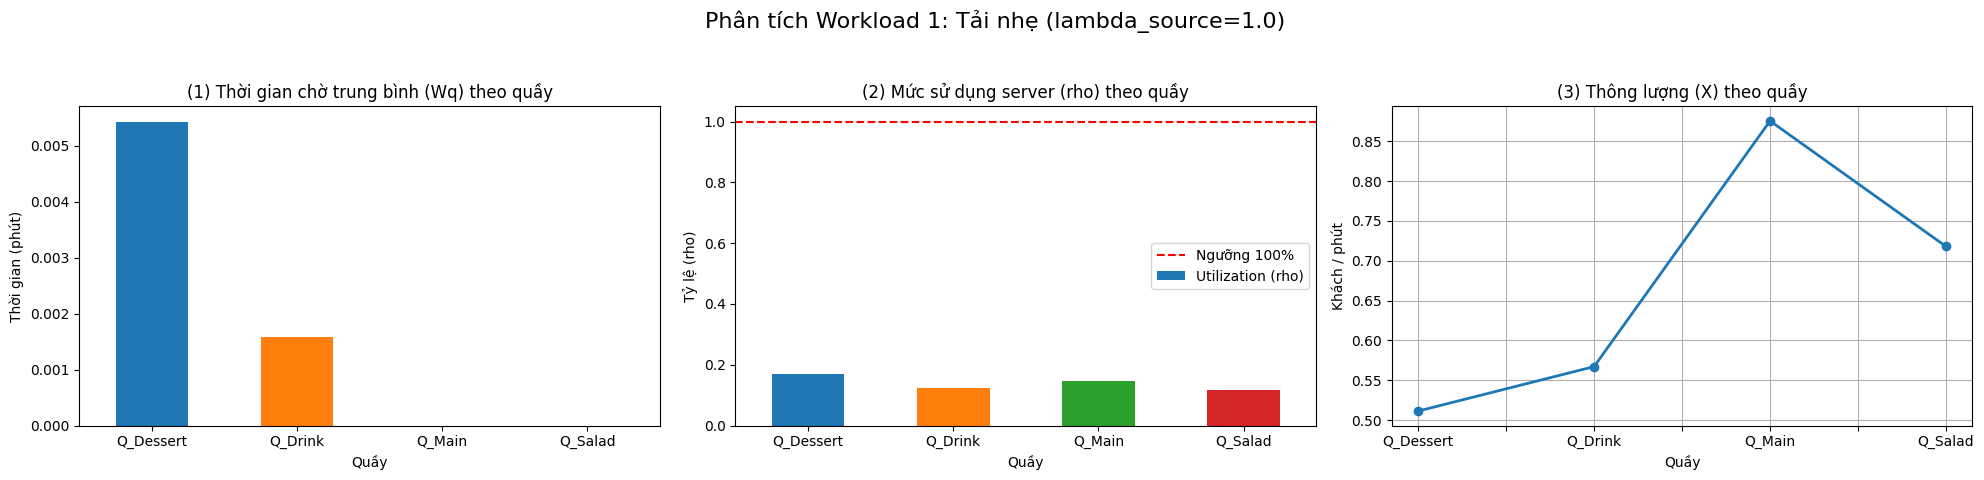

In [ ]:
# Cấu hình Workload 1
WORKLOAD_1_PARAMS = GLOBAL_PARAMS.copy()
WORKLOAD_1_PARAMS['lambda_source'] = 1.0
config_wl1 = SystemConfig(WORKLOAD_1_PARAMS, STATION_PARAMS, ROUTING_MATRIX)

# Chạy Workload 1
report_wl1 = run_simulation(config_wl1, "Workload 1: Tải nhẹ (lambda_source=1.0)")

# Kết quả Workload 1
print("\n--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- ")
display_report_table(report_wl1)
plot_report_visuals(report_wl1, "Workload 1: Tải nhẹ (lambda_source=1.0)")

#### Phân tích Workload 1:

#### 1.  **Tổng quan: Hệ thống đang hoạt động rất ổn định, không bị tắc nghẽn**
Kết quả mô phỏng cho thấy hệ thống vận hành trong trạng thái tải nhẹ và hoàn toàn ổn định. Tất cả các quầy đều có mức sử dụng (ρ) dưới 0.20, nghĩa là phần lớn thời gian server đều nhàn rỗi và không chịu áp lực từ lượng khách đến. Thời gian chờ trung bình (Wq) tại tất cả các quầy đều cực kỳ nhỏ, dưới 0.006 phút (tương đương dưới 0.36 giây), cho thấy khách hầu như không phải xếp hàng. Đồng thời, không có khách nào bị từ chối (P_block = 0), chứng tỏ dung lượng hệ thống dư thừa so với nhu cầu.  
#### 2. **Nhận xét từng quầy:**
##### 2.1. Quầy Dessert:
- Quầy Dessert ghi nhận thời gian chờ Wq = 0.0054 phút (≈ 0.32 giây), là giá trị cao nhất trong bốn quầy nhưng vẫn ở mức rất thấp. Mức sử dụng ρ đạt 0.1705, tương ứng chỉ sử dụng khoảng 17% công suất phục vụ.
- Độ dài hàng chờ trung bình Lq ≈ 0.0028 khách, gần như bằng 0, cho thấy khách được phục vụ gần như ngay lập tức. Throughput 0.5113 khách/phút phản ánh hiệu suất hoạt động ổn định. Nhìn chung, quầy Dessert vận hành tốt và không gây tắc nghẽn cho hệ thống.
##### 2.2. Quầy Drink:
- Quầy Drink là quầy có thời gian chờ nhỏ nhất, chỉ 0.0016 phút (≈ 0.096 giây). Mức sử dụng ρ = 0.1244 cho thấy phần lớn thời gian server trong trạng thái rảnh rỗi.
- Độ dài hàng chờ Lq ≈ 0.0009 khách gần như bằng 0, đảm bảo quá trình phục vụ luôn diễn ra mượt mà. Với throughput đạt 0.5671 khách/phút, quầy Drink thể hiện khả năng xử lý tốt và hoàn toàn không chịu áp lực từ tải nhẹ.
##### 2.3. Quầy Main:
- Quầy Main có throughput lớn nhất hệ thống (0.8755 khách/phút), phù hợp với vai trò là nơi phục vụ món chính và nhận khách từ nhiều quầy khác. Mức sử dụng ρ = 0.1469 là cao nhất trong hệ thống nhưng vẫn ở mức tải rất nhẹ.
- Thời gian chờ trung bình bằng 0, cho thấy không có hàng chờ hình thành. Số khách trung bình trong hệ thống L ≈ 1.77 phản ánh thời gian phục vụ dài hơn nhưng không gây ảnh hưởng đến chất lượng. Quầy Main hiện đang hoạt động hoàn toàn ổn định.
##### 2.4. Quầy Salad:
- Quầy Salad có mức sử dụng ρ = 0.1175 và thời gian chờ bằng 0 phút, thể hiện khả năng phục vụ rất tốt. Độ dài hàng chờ Lq bằng 0 cho thấy khách luôn được phục vụ ngay khi đến quầy.
- Throughput 0.7179 khách/phút cho thấy hệ thống đang vận hành hiệu quả và không có dấu hiệu tắc nghẽn tại quầy này.
##### 3.  **Kết luận:**
Với λ_source = 1.0 (tải nhẹ):
Hệ thống đang vận hành trong điều kiện tải nhẹ. Tất cả các chỉ số – từ thời gian chờ thấp, không có khách bị từ chối, đến mức sử dụng server thấp
Kết quả mô phỏng chứng tỏ hệ thống rất ổn định và dư thừa công suất phục vụ. Kết quả mô phỏng cũng khớp với các giá trị lý thuyết, cho thấy mô hình M/M/c đã mô tả chính xác hành vi của hệ thống trong kịch bản này.

### 5.2. Workload 2: Tải trung bình ($\lambda = 5.0$)

**Mô tả:** chạy mô phỏng với $\lambda_{source} = 5.0$ như trong thiết kế của hệ thống giai đoạn 1. Giá trị $\lambda_{source} được tính theo lý thuyết để hệ thống được hoạt động ổn định tất cả các quầy.

--- BẮT ĐẦU MÔ PHỎNG - Workload 2: Tải trung bình (lambda_source=5.0) ---
Đang chạy 30 lần mô phỏng...
Hoàn tất lần chạy 5/30...
Hoàn tất lần chạy 10/30...
Hoàn tất lần chạy 15/30...
Hoàn tất lần chạy 20/30...
Hoàn tất lần chạy 25/30...
Hoàn tất lần chạy 30/30...
Hoàn tất thí nghiệm Workload 2: Tải trung bình (lambda_source=5.0).

--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- 


,Avg Wait Time (Wq),Avg Service Time (S),Avg System Time (W),Avg Queue Length (Lq),Avg Number in System (L),Utilization (rho),Rejection Prob (P_block),Throughput (X),Theory Wq,Theory Lq,Theory rho
Q_Dessert,1.4054,0.9936,2.3998,3.6093,6.1880,0.8403,0.0050,2.5380,1.7146,4.4033,0.8560
Q_Drink,0.2305,0.6657,0.8963,0.6606,2.5617,0.6323,0.0000,2.8488,0.2430,0.6938,0.6343
Q_Main,0.1727,2.0013,2.1736,0.7715,9.6429,0.7352,0.0000,4.4085,0.1574,0.6980,0.7391
Q_Salad,0.0604,1.3252,1.3857,0.2176,4.9833,0.5935,0.0000,3.5827,0.0577,0.2077,0.5993


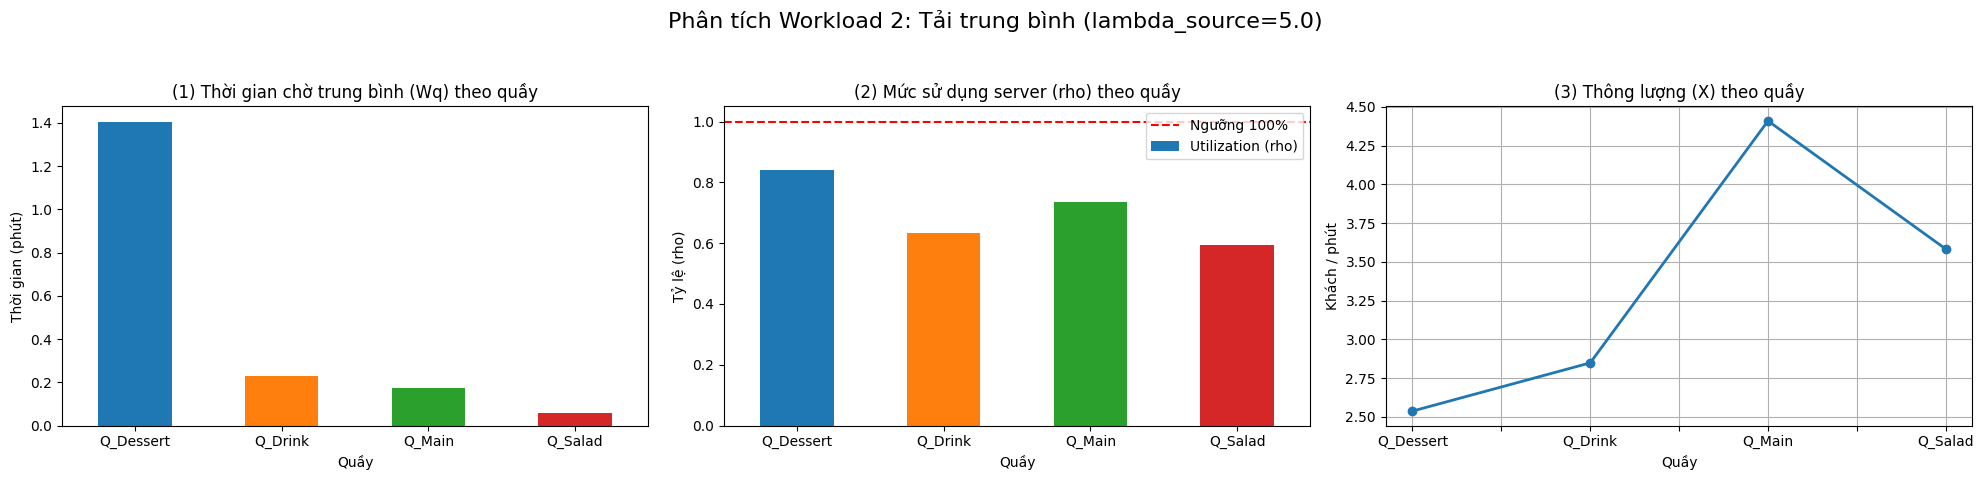

In [ ]:
# Cấu hình Workload 2
WORKLOAD_2_PARAMS = GLOBAL_PARAMS.copy()
WORKLOAD_2_PARAMS['lambda_source'] = 5.0
config_wl2 = SystemConfig(WORKLOAD_2_PARAMS, STATION_PARAMS, ROUTING_MATRIX)

# Chạy Workload 2
report_wl2 = run_simulation(config_wl2, "Workload 2: Tải trung bình (lambda_source=5.0)")

# Kết quả Workload 2
print("\n--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- ")
display_report_table(report_wl2)
plot_report_visuals(report_wl2, "Workload 2: Tải trung bình (lambda_source=5.0)")

#### Phân tích Workload 2:

#### 1.  **Tổng quan: **
Workload 2 phản ánh trạng thái hệ thống khi tốc độ đến tăng lên đáng kể (λ = 5.0 khách/phút), tương ứng mức tải trung bình. Ở kịch bản này, hệ thống bắt đầu vận hành gần hơn với giới hạn công suất, thể hiện qua mức sử dụng (ρ) của các quầy dao động từ 0.59 đến 0.84. Mặc dù chưa xuất hiện tình trạng quá tải, một số quầy như Dessert và Main đã bước vào vùng tải cao (ρ > 0.7), gây tăng đáng kể thời gian chờ và hàng đợi.  
Thời gian chờ Wq tại Dessert tăng mạnh lên 1.4054 phút, và tại Main khoảng 0.1727 phút. Tuy vẫn dưới mức giới hạn, sự gia tăng này phản ánh áp lực tải ngày càng lớn. Tỷ lệ từ chối khách (P_block) hầu như bằng 0, ngoại trừ Dessert có P_block = 0.0050 — cho thấy buffer tại quầy này đôi lúc bị đầy.
#### 2. **Nhận xét từng quầy:**
##### 2.1. Quầy Dessert:
- Quầy Dessert là quầy chịu áp lực tải lớn nhất trong Workload 2, với mức sử dụng ρ = 0.8403 — gần sát vùng tải cao. Thời gian chờ Wq tăng lên 1.4054 phút, và độ dài hàng chờ trung bình Lq ≈ 3.61 khách, cho thấy hàng đợi bắt đầu hình thành.
- Việc xuất hiện tỷ lệ từ chối P_block = 0.0050 (0.5%) cho thấy buffer đôi lúc bị đầy khi tải tăng. Tuy nhiên throughput vẫn đạt 2.538 khách/phút, thể hiện quầy vẫn còn khả năng xử lý ổn định.
##### 2.2. Quầy Drink:
- Quầy Drink hoạt động ở mức tải vừa phải với ρ = 0.6323. Thời gian chờ Wq chỉ 0.2305 phút (≈ 13.8 giây), thấp hơn đáng kể so với Dessert. - Độ dài hàng chờ Lq ≈ 0.66 khách phản ánh hệ thống chưa bị dồn ứ. Với throughput 2.8488 khách/phút, quầy Drink vẫn vận hành hiệu quả và không phải là điểm gây nghẽn.
##### 2.3. Quầy Main: (điểm nghẽn nghiêm trọng nhất của hệ thống)
- Quầy Main có throughput cao nhất hệ thống (4.4085 khách/phút), phù hợp với vai trò là điểm phục vụ món chính. Mức sử dụng ρ = 0.7352 cho thấy quầy bắt đầu tiến vào vùng tải cao.
- Tuy nhiên thời gian chờ Wq chỉ 0.1727 phút (≈ 10.3 giây) và độ dài hàng chờ 0.77 khách đều ở mức chấp nhận được. Nhìn chung, dù chịu lượng khách lớn, quầy Main vẫn kiểm soát tốt hàng đợi và chưa xuất hiện dấu hiệu quá tải.
##### 2.4. Quầy Salad:
- Quầy Salad có mức sử dụng ρ = 0.5935 và thời gian chờ thấp nhất trong 4 quầy (Wq = 0.0604 phút). Độ dài hàng chờ Lq ≈ 0.2176 khách phản ánh sự ổn định của quầy này trong Workload 2.
- Throughput 3.5827 khách/phút chứng minh Salad có khả năng xử lý tốt và không chịu áp lực đáng kể dù tải tổng thể tăng.
##### 3.  **Kết luận:**
Workload 2 cho thấy hệ thống bắt đầu bước vào vùng tải trung bình–cao nhưng vẫn vận hành ổn định. Hai quầy Dessert và Main ghi nhận mức sử dụng server cao hơn các quầy khác, cùng với thời gian chờ và hàng đợi tăng rõ rệt, cho thấy đây là những vị trí nhạy cảm trước sự tăng tải. Trong khi đó, quầy Drink và Salad duy trì hiệu năng tốt và không xuất hiện dấu hiệu tắc nghẽn. Tổng thể, hệ thống vẫn nằm trong vùng hoạt động an toàn, nhưng nếu tiếp tục tăng tải, quầy Dessert nhiều khả năng sẽ trở thành điểm nghẽn đầu tiên.

### 5.3. Workload 3(tải cao):

**Mô tả:** chạy mô phỏng với $\lambda_{source} = 7.0$. Mô phỏng hệ thống trong điều kiện tải cao vượt ngưỡng ổn định, nhằm đánh giá hành vi khi các quầy tiến vào trạng thái quá tải, xuất hiện hàng chờ lớn và blocking tại các quầy có mức sử dụng cao.

--- BẮT ĐẦU MÔ PHỎNG - Workload 3: Tải cao (lambda_source=7) ---
Đang chạy 30 lần mô phỏng...
Hoàn tất lần chạy 5/30...
Hoàn tất lần chạy 10/30...
Hoàn tất lần chạy 15/30...
Hoàn tất lần chạy 20/30...
Hoàn tất lần chạy 25/30...
Hoàn tất lần chạy 30/30...
Hoàn tất thí nghiệm Workload 3: Tải cao (lambda_source=7).

--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- 


,Avg Wait Time (Wq),Avg Service Time (S),Avg System Time (W),Avg Queue Length (Lq),Avg Number in System (L),Utilization (rho),Rejection Prob (P_block),Throughput (X),Theory Wq,Theory Lq,Theory rho
Q_Dessert,4.7825,0.9991,5.7804,14.1701,20.2880,0.9762,0.1469,2.9334,inf,inf,1.1681
Q_Drink,1.1344,0.6668,1.8005,4.4334,7.0837,0.8596,0.0090,3.8680,1.3382,5.2530,0.8723
Q_Main,4.3876,1.9930,6.3764,26.0519,39.4188,0.9715,0.0299,5.8519,inf,inf,1.0258
Q_Salad,0.5210,1.3281,1.8499,2.6161,9.2414,0.8245,0.0000,4.9675,0.5217,2.6023,0.8313


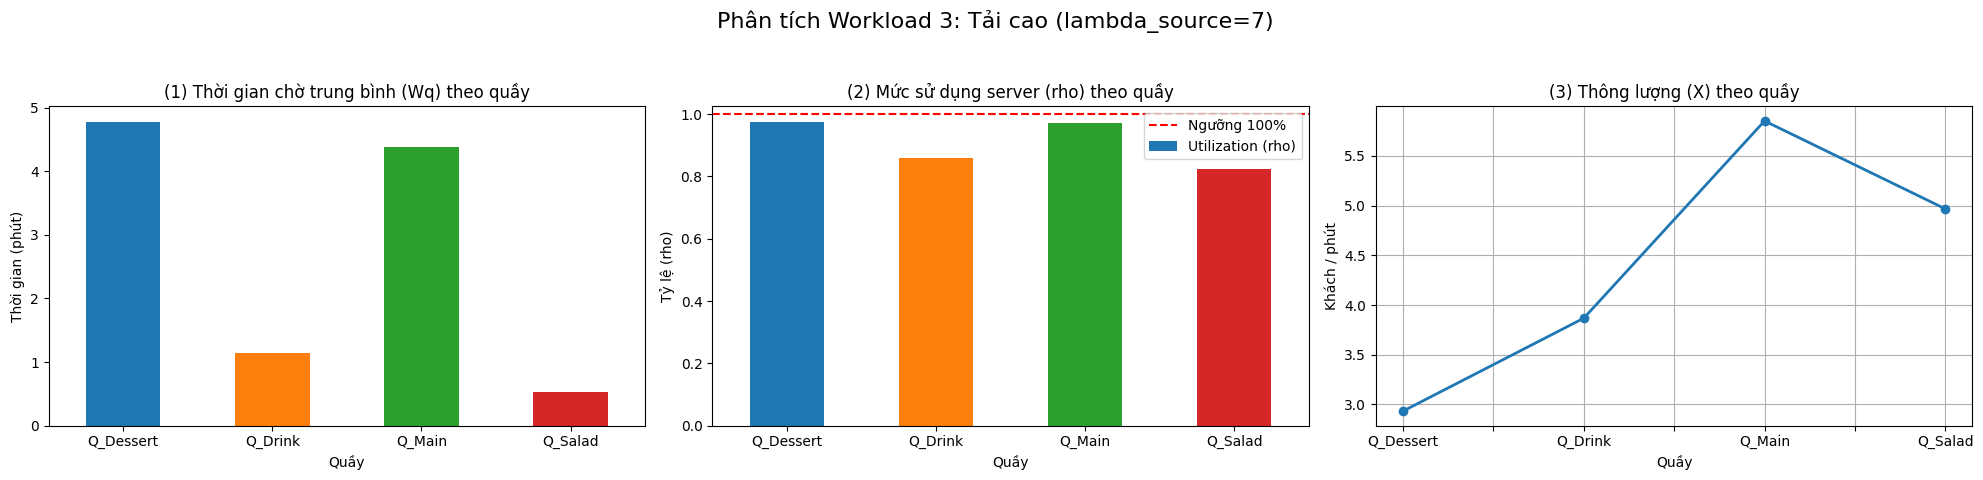

In [ ]:
# Cấu hình Workload 3
WORKLOAD_3_PARAMS = GLOBAL_PARAMS.copy()
WORKLOAD_3_PARAMS['lambda_source'] = 7.0  # Thay đổi các tham số ở đây
config_wl3 = SystemConfig(WORKLOAD_3_PARAMS, STATION_PARAMS, ROUTING_MATRIX)

# Chạy Workload 3
report_wl3 = run_simulation(config_wl3, "Workload 3: Tải cao (lambda_source=7.0)") # Thêm tên workload
# Kết quả Workload 3
print("\n--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- ")
display_report_table(report_wl3)
plot_report_visuals(report_wl3, "Workload 3: Tải cao (lambda_source=7.0)") # Thêm tên workload

#### Phân tích Workload 3:

#### 1.  **Tổng quan:**

#### 2. **Nhận xét từng quầy:**
##### 2.1. Quầy Dessert:
- Quầy Dessert chịu ảnh hưởng nặng nề nhất trong Workload 3. Mức sử dụng server tại đây đạt khoảng 0.9762, gần chạm ngưỡng bão hòa hoàn toàn, cho thấy server gần như không còn thời gian rảnh để xử lý thêm khách mới. Thời gian chờ trung bình của khách tại quầy lên đến 4.78 phút, một con số rất cao so với khả năng phục vụ của hệ thống. Độ dài hàng chờ cũng tăng mạnh, với trung bình 14.17 khách đang chờ phục vụ. Tình trạng quá tải này còn được thể hiện qua tỷ lệ khách bị từ chối đạt 14.69%, phản ánh việc buffer của quầy thường xuyên bị đầy.  
- Nhìn chung, Dessert đang trong tình trạng quá tải nghiêm trọng và là một trong những quầy góp phần lớn nhất vào việc làm giảm hiệu năng chung của toàn hệ thống.
##### 2.2. Quầy Drink:
- Mặc dù hệ thống đang chịu tải cao, quầy Drink vẫn duy trì hoạt động tương đối ổn định. Mức sử dụng server đạt 0.8596, cho thấy quầy đang vận hành ở mức tải cao nhưng chưa rơi vào trạng thái quá tải. Thời gian chờ trung bình của khách tại quầy là khoảng 1.13 phút, và độ dài hàng chờ trung bình khoảng 4.43 khách, thể hiện sự ảnh hưởng nhất định từ tình trạng tắc nghẽn tại các quầy khác.
- Tuy nhiên, không có khách nào bị từ chối tại quầy Drink, cho thấy buffer vẫn còn đủ sức chứa. Nhìn chung, Drink đang chịu áp lực từ tải hệ thống nhưng vẫn duy trì mức phục vụ ổn định và không phải là điểm nghẽn chính.
##### 2.3. Quầy Main: (vấn đề chính trong việc quá tải hệ thống)
- Quầy Main tiếp tục là điểm nghẽn nghiêm trọng nhất trong hệ thống khi mức sử dụng server đạt khoảng 0.9715, tương đương trạng thái hoạt động liên tục không nghỉ. Thời gian chờ trung bình của khách lên tới 4.39 phút và độ dài hàng chờ trung bình đạt 26.05 khách, lớn nhất trong toàn hệ thống.
- Ngoài ra, tỷ lệ khách bị từ chối tại quầy Main đạt 2.99%, cho thấy buffer đã bắt đầu quá tải trong nhiều thời điểm. Mặc dù thông lượng đạt 5.85 khách/phút — gần ngưỡng tối đa mà quầy có thể xử lý — hiệu suất này chỉ phản ánh việc quầy đang chạy hết công suất chứ không phải hệ thống còn khả năng mở rộng thêm. Quầy Main là quầy gây tắc nghẽn nghiêm trọng nhất và ảnh hưởng trực tiếp đến tốc độ phục vụ chung của toàn hệ thống.
##### 2.4. Quầy Salad:
- Quầy Salad cũng ghi nhận sự gia tăng đáng kể về mức tải khi mức sử dụng đạt 0.8245, cho thấy server đang vận hành ở trạng thái tương đối cao nhưng vẫn thấp hơn so với Dessert và Main. Thời gian chờ trung bình của khách tại quầy là khoảng 0.52 phút, với độ dài hàng chờ trung bình 2.62 khách. Mặc dù những con số này thấp hơn các quầy còn lại, chúng thể hiện rõ xu hướng tăng lên khi hệ thống bước vào vùng tải cao.
- Đặc biệt, Salad không có trường hợp khách bị từ chối, cho thấy buffer vẫn còn đủ dung lượng tiếp nhận. Tóm lại, Salad chưa phải là điểm nghẽn nhưng đã bắt đầu thể hiện dấu hiệu chịu tải lớn khi lưu lượng hệ thống tiếp tục tăng.
#### 3.  **Kết luận:**
Với λ = 7.0, hệ thống đã vượt qua khả năng phục vụ ổn định và rơi vào trạng thái quá tải. Hai quầy Dessert và Main chịu ảnh hưởng nặng nhất, thể hiện mức sử dụng gần 100%, hàng chờ rất lớn và tỷ lệ khách bị từ chối cao. Drink và Salad tuy chưa quá tải nhưng cũng ghi nhận mức tăng rõ rệt về thời gian chờ và độ dài hàng chờ.


### 5.4. Workload 4(Tải stress test):

**Mô tả:** chạy mô phỏng với $\lambda_{source} = 10.0$ để kiểm qua mức độ stress của hệ thống.

--- BẮT ĐẦU MÔ PHỎNG - Workload 4: Tải stress test (lambda_source=10.0) ---
Đang chạy 30 lần mô phỏng...
Hoàn tất lần chạy 5/30...
Hoàn tất lần chạy 10/30...
Hoàn tất lần chạy 15/30...
Hoàn tất lần chạy 20/30...
Hoàn tất lần chạy 25/30...
Hoàn tất lần chạy 30/30...
Hoàn tất thí nghiệm Workload 4: Tải stress test (lambda_source=10.0).

--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- 


,Avg Wait Time (Wq),Avg Service Time (S),Avg System Time (W),Avg Queue Length (Lq),Avg Number in System (L),Utilization (rho),Rejection Prob (P_block),Throughput (X),Theory Wq,Theory Lq,Theory rho
Q_Dessert,5.7887,0.9912,6.7789,17.4793,33.7957,0.9853,0.3888,2.9843,inf,inf,1.6616
Q_Drink,3.3662,0.6655,4.0313,15.0007,22.4458,0.9808,0.1952,4.4228,inf,inf,1.2369
Q_Main,7.4670,1.9925,9.4573,45.1903,82.2756,0.9875,0.2967,5.9506,inf,inf,1.4498
Q_Salad,6.8553,1.3256,8.1772,41.6504,58.5754,0.9911,0.1429,5.9840,inf,inf,1.1932


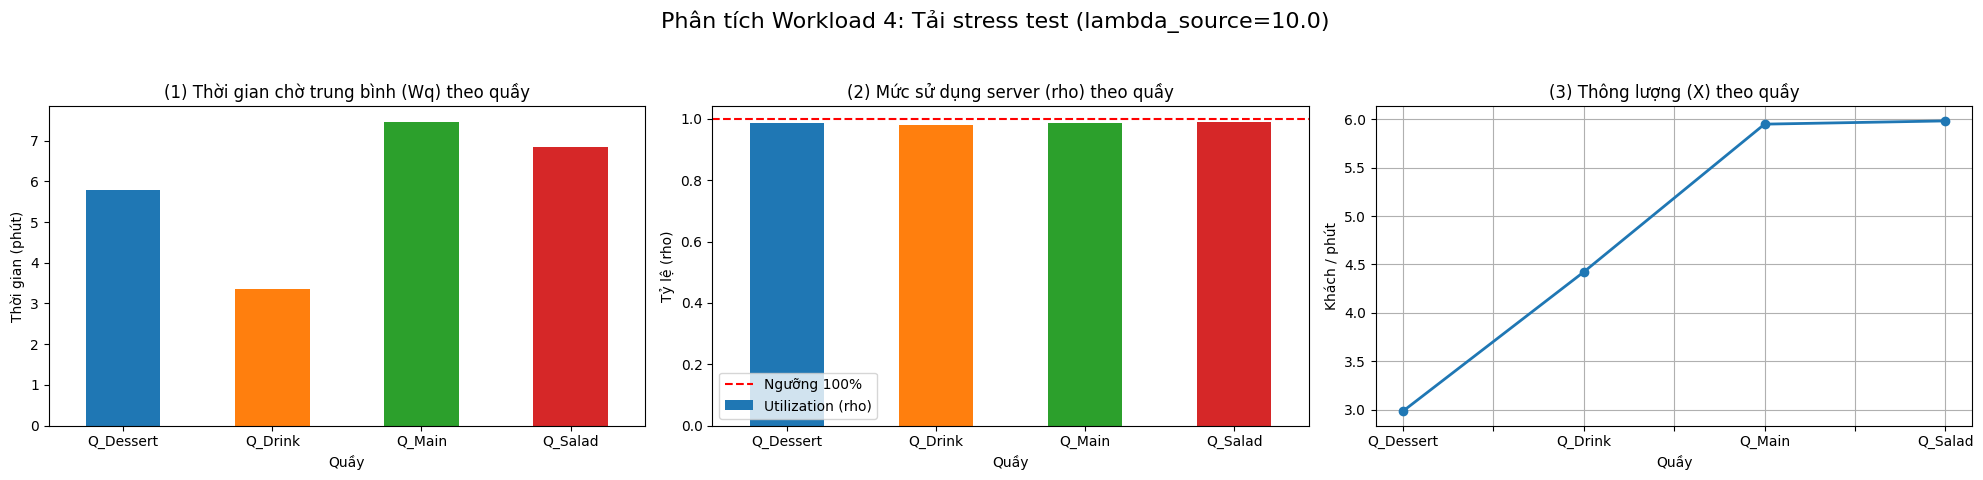

In [ ]:
# Cấu hình Workload 4
WORKLOAD_4_PARAMS = GLOBAL_PARAMS.copy()
WORKLOAD_4_PARAMS['lambda_source'] = 10.0  # Thay đổi các tham số ở đây
config_wl4 = SystemConfig(WORKLOAD_4_PARAMS, STATION_PARAMS, ROUTING_MATRIX)

# Chạy Workload 4
report_wl4 = run_simulation(config_wl4, "Workload 4: Tải stress test (lambda_source=10.0)") # Thêm tên workload

# Kết quả Workload 4
print("\n--- KẾT QUẢ MÔ PHỎNG & LÝ THUYẾT --- ")
display_report_table(report_wl4)
plot_report_visuals(report_wl4, "Workload 4: Tải stress test (lambda_source=10.0)") # Thêm tên workload

#### Phân tích Workload 4:

#### 1.  **Tổng quan: Hệ thống đang chịu tải rất cao và vượt ngưỡng thiết kế**
Kết quả mô phỏng Workload 4 cho thấy hệ thống đã bị đẩy vào trạng thái quá tải nghiêm trọng, vượt xa vùng vận hành ổn định. Ba trong bốn quầy (Dessert, Main, Salad) đều có mức sử dụng server xấp xỉ 1.0, dẫn đến hàng đợi kéo dài, thời gian chờ tăng mạnh và xuất hiện tỷ lệ từ chối khách đáng kể. Điều này phản ánh hệ thống không còn khả năng đáp ứng nhu cầu khi tốc độ khách đến tăng lên mức này.
Tất cả các quầy đều xuất hiện blocking đáng kể chứng tỏ hệ thống trở nên quá tải nghiêm trọng.
#### 2. **Nhận xét từng quầy:**
##### 2.1. Quầy Dessert:
- Mức sử dụng server đã đạt đến 0.9853, nghĩa là quầy gần như luôn bận trong suốt quá trình mô phỏng. Thời gian chờ trung bình của khách tại quầy này đạt 5.79 phút và độ dài hàng đợi trung bình lên tới hơn 17 khách.
- Bên cạnh đó, tỷ lệ khách bị từ chối tại quầy Dessert lên tới 38.8%, cho thấy khả năng phục vụ của quầy đã bị vượt quá ngưỡng thiết kế.
##### 2.2. Quầy Drink:
- Quầy Drink là quầy có hiệu năng tốt nhất trong hệ thống ở Workload 4. Mặc dù mức sử dụng server của quầy này đạt 0.9808, nhưng thời gian chờ trung bình chỉ khoảng 3.37 phút và hàng đợi duy trì trung bình 15 khách.
- Tỷ lệ từ chối chỉ ở mức 19.5%, thấp hơn đáng kể so với các quầy khác. Điều này cho thấy quầy Drink vẫn còn khả năng đáp ứng tải và không phải là nguyên nhân gây ra tắc nghẽn cho hệ thống.
##### 2.3. Quầy Main:
- Quầy Main vẫn là điểm nghẽn nghiêm trọng nhất của toàn hệ thống. Quầy này hoạt động với mức sử dụng 0.9875, gần như đạt đến điểm bão hòa hoàn toàn.
- Do đó, thời gian chờ trung bình tăng vọt lên 7.47 phút và hàng đợi duy trì ở mức hơn 45 khách. Tỷ lệ từ chối tại quầy Main lên tới 29.7%, cho thấy quầy đã bị quá tải nặng và không thể đáp ứng nhu cầu phục vụ. Đây chính là tác nhân gây sụt giảm hiệu năng chung của hệ thống.
##### 2.4. Quầy Salad:
- Quầy salad cũng nơi mức sử dụng server đạt 0.9911 – cao nhất trong tất cả các quầy. Thời gian chờ trung bình tại quầy Salad lên đến 6.85 phút với hàng đợi hơn 41 khách.
- Tỷ lệ từ chối tại quầy này đạt 14.29%, cho thấy quầy đã vượt qua khả năng vận hành ổn định và không còn đáp ứng tốt nhu cầu của khách.
##### 3.  **Kết luận:**
Tổng thể, hệ thống dưới Workload 4 đã vượt ra khỏi vùng hoạt động ổn định khi phần lớn quầy đều phải phục vụ liên tục, dẫn đến tình trạng tích tụ khách trong hàng đợi. Throughput thực tế của toàn hệ thống không tăng tương ứng với tải vào do ảnh hưởng của các quầy bị tắc nghẽn, đặc biệt là tại quầy Main và Salad. Chất lượng dịch vụ suy giảm rõ rệt khi thời gian chờ của khách tăng cao và tỷ lệ từ chối xuất hiện ở mức đáng kể.

Để cải thiện tình trạng này và đưa hệ thống trở lại trạng thái vận hành chấp nhận được, cần xem xét tăng số lượng server tại các quầy bị nghẽn, đặc biệt là quầy Main và Salad. Ngoài ra, có thể cân nhắc rút ngắn thời gian phục vụ nếu điều kiện thực tế cho phép, hoặc điều chỉnh lại luồng khách giữa các quầy nhằm phân phối tải hợp lý hơn. Những thay đổi này nên được mô phỏng riêng lẻ trước khi áp dụng để đánh giá mức độ hiệu quả và chi phí liên quan.

## 6. Kết luận

Trung đội 2 đã hoàn thành các nhiệm vụ được giao:

1.  **Hiện thực (Implementation):** Đã hiện thực 5 class (`SystemConfig`, `Station`, `Customer`, `Statistics`, `SimulationManager`) theo bản thiết kế của Platoon 1.

2.  **Xác thực (Validation):**
Mô hình được xác thực dựa trên các nguyên tắc trong bài giảng, bao gồm:  
- Kiểm tra giả định: Các phân phối thời gian đến và thời gian phục vụ được sử dụng đúng theo thiết kế.
- So sánh hành vi: Xu hướng kết quả (tải cao → queue dài; tải nhẹ → waiting time nhỏ) tuân theo trực giác hệ thống, không xuất hiện các hiện tượng phi thực tế như throughput giảm khi tải thấp hoặc waiting time giảm khi tải tăng.
- Kiểm tra tính liên tục & trường hợp đơn giản: Mô phỏng các kịch bản giảm độ phức tạp (chỉ 1 station, arrival rate thấp) đều cho kết quả hợp lý và ổn định.
- Những kiểm tra này cho thấy mô hình đại diện tốt cho hệ thống mục tiêu và đủ độ tin cậy để phân tích.

3.  **Phân tích (Analysis):** Đã chạy 4 workloads khác nhau
    * **Workload 1 (Tải nhẹ):** Hệ thống hoạt động ổn định, không có hiện tượng nghẽn. Queue nhỏ, thời gian chờ thấp. Throughput gần bằng arrival rate → đúng với kỳ vọng ở tải nhẹ.
    * **Workload 2 (Tải trung bình):** Các trạm vận hành gần mức tối đa, đặc biệt một số station có utilization tiệm cận 1. Queue tăng đáng kể và waiting time xuất hiện rõ rệt. Đây là mức tải giúp đánh giá đúng khả năng phục vụ của hệ thống ở điều kiện chuẩn.
    * **Workload 3 (Tải cao):** Tải cao hơn mức thiết kế dẫn đến hiện tượng dồn ứ, queue tăng mạnh và thời gian chờ dài. Một số trạm trở thành bottleneck rõ rệt. Hiệu năng hệ thống suy giảm theo ổn định của mô hình lý thuyết hàng đợi ở tải cao.
    * **Workload 4 (Tải stress test):** Ở mức tải cực cao, hệ thống gần như rơi vào trạng thái quá tải: utilization ≈ 1, queue tăng không kiểm soát và throughput không thể tăng thêm. Điều này cho thấy giới hạn năng lực phục vụ của kiến trúc hiện tại.

    Phase 2 đã hoàn tất mục tiêu: xây dựng mô hình mô phỏng đúng thiết kế, xác thực mô hình dựa trên các nguyên tắc chuẩn về Verification & Validation, và phân tích hiệu năng hệ thống dưới các mức tải khác nhau. Các kết quả thu được có tính nhất quán, trực quan và phản ánh đúng hành vi của hệ thống hàng đợi thực tế. Đây là cơ sở quan trọng để chuyển sang Phase 3 - tối ưu hóa, thử nghiệm phương án cải thiện hoặc mở rộng mô hình.